### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

In [214]:
# !pip install seaborn

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [216]:
# 한글 폰트 사용을 위한 설정
import matplotlib.font_manager as fm
import matplotlib

font_path = 'C:/Windows/Fonts/batang.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가
    - **DiscountRate**: 할인율

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [217]:
# 1-1
df = pd.read_csv('./data/ecommerce_sales_data.csv')
display(df)
display(df.head(5))

# 1-2.

df[df.duplicated()]
df.isna().sum()     # 중복값, 결측값 조회 - 결측값 1개
df['DiscountRate'] = df['DiscountRate'].fillna('0')     # 결측값 0으로 대체
df.info()

# 1-3.
df.info()
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.info()


,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09
...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57,독일,0.20
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37,대한민국,0.09
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27,독일,0.09
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 9:01,독일,0.06


,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국,0.14
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일,0.29
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국,0.23
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본,0.20
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국,0.09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OrderID       120 non-null    int64 
 1   Product       120 non-null    object
 2   Category      120 non-null    object
 3   Quantity      120 non-null    int64 
 4   Price         120 non-null    int64 
 5   CustomerID    120 non-null    int64 
 6   Birthdate     120 non-null    object
 7   OrderDate     120 non-null    object
 8   Country       120 non-null    object
 9   DiscountRate  120 non-null    object
dtypes: int64(4), object(6)
memory usage: 9.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   OrderID       120 non-null    int64 
 1   Product       120 non-null    object
 2   Category      120 non-null    object
 3   Quantity      120 non

2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [218]:
# 2-1
df['TotalRevenue'] = df['Quantity'] * df['Price']
df


,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country,DiscountRate,TotalRevenue
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18:00,미국,0.14,185000
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45:00,독일,0.29,100000
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19:00,중국,0.23,32000
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 02:19:00,일본,0.2,8000
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34:00,대한민국,0.09,78000
...,...,...,...,...,...,...,...,...,...,...,...
115,116,스마트워치,Electronics,1,33000,1508,1971-01-02,2024-03-01 16:57:00,독일,0.2,33000
116,117,스마트워치,Electronics,4,41000,1645,1975-03-15,2024-01-18 21:37:00,대한민국,0.09,164000
117,118,태블릿,Electronics,1,33000,1433,1965-02-01,2024-09-29 12:27:00,독일,0.09,33000
118,119,청바지,Clothing,2,43000,1497,1980-04-02,2024-06-10 09:01:00,독일,0.06,86000


C:\Users\Playdata\AppData\Local\Temp\ipykernel_9392\3314700783.py:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_revenue = df.resample('M')['TotalRevenue'].sum()


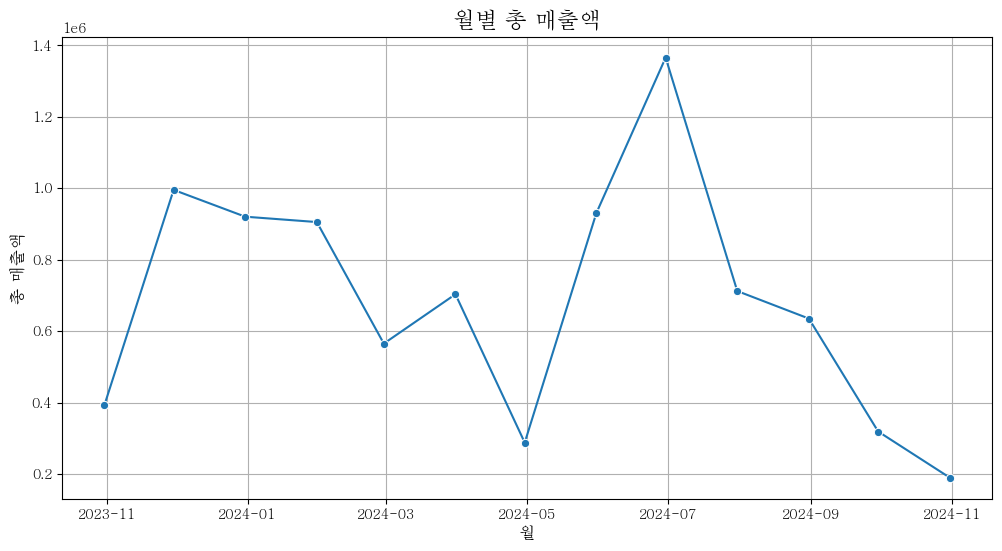

In [219]:
# 2-2. 월별 총 매출액을 집계하여 시각화하세요.
#        # - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
# df['TotalRevenue'] = df['Quantity'] * df['Price']

# df.set_index('OrderDate', inplace=True)
# df.reset_index(inplace=True)

# monthly_revenue = df.resample('M')['TotalRevenue'].sum()

# plt.figure(figsize=(12, 6))
# sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o') 
# plt.title('월별 총 매출액', fontsize=16)
# plt.xlabel('월', fontsize=12)
# plt.ylabel('총 매출액', fontsize=12)
# plt.grid(True)
# plt.show()

# 1. 날짜 인덱스 세팅
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.set_index('OrderDate', inplace=True)

# 2. 월별 집계 (resample)
monthly_revenue = df.resample('M')['TotalRevenue'].sum()

# 3. 시각화 (index가 월)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o')
plt.title('월별 총 매출액', fontsize=16)
plt.xlabel('월', fontsize=12)
plt.ylabel('총 매출액', fontsize=12)
plt.grid(True)
plt.show()

# 4. 이후 필요하면 인덱스를 컬럼으로
monthly_revenue = monthly_revenue.reset_index()


In [220]:
df.columns

Index(['OrderID', 'Product', 'Category', 'Quantity', 'Price', 'CustomerID',
       'Birthdate', 'Country', 'DiscountRate', 'TotalRevenue'],
      dtype='object')

In [221]:
# 2-3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
top_3_categories = df.groupby('Category')['TotalRevenue'].sum().sort_values(ascending=False).head(3)
print(top_3_categories)

Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64


In [222]:
# 2-4.
top_5_countries = df.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False).head(5)

print(top_5_countries)

Country
미국      2238000
독일      1973000
중국      1766000
일본      1523000
대한민국    1419000
Name: TotalRevenue, dtype: int64


3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [223]:
# 3-1.
top_customer = df.groupby('CustomerID')['TotalRevenue'].sum().sort_values(ascending=False).head(5)
print(top_customer)

CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64


In [224]:
# 3-2.
top_customer = df.groupby('Quantity')['TotalRevenue'].sum().sort_values(ascending=False).head(5)
print(top_customer)

Quantity
5    3080000
4    2316000
3    1866000
1     859000
2     798000
Name: TotalRevenue, dtype: int64


In [225]:
# 3-3.**연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        # - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.
df['Birthdate'] = pd.to_datetime(df['Birthdate'])

current_year = 2025
df['Age'] = current_year - df['Birthdate'].dt.year

bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['10대이하', '20대', '30대', '40대', '50대', '60대이상']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_category_counts = df.groupby(['AgeGroup', 'Category']).size().unstack(fill_value=0)

top_category_by_age = age_category_counts.idxmax(axis=1)

print(top_category_by_age)

AgeGroup
10대이하         Beauty
20대           Beauty
30대             Food
40대            Books
50대      Electronics
60대이상    Electronics
dtype: object


C:\Users\Playdata\AppData\Local\Temp\ipykernel_9392\1799026448.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_counts = df.groupby(['AgeGroup', 'Category']).size().unstack(fill_value=0)


4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [226]:
# 4-1
top_product = df.groupby('Product')['TotalRevenue'].sum().sort_values(ascending=False).head(5)
print(top_product)

Product
셔츠     716000
커피     638000
역사책    574000
초콜릿    561000
헤드폰    532000
Name: TotalRevenue, dtype: int64


In [227]:
# 4-2. 카테고리별로 가장 많이 판매된 상품을 찾아 출력하세요
grouped = df.groupby(['Category', 'Product'])['TotalRevenue'].sum()     # 상품별 매출 집계
grouped = grouped.reset_index()

idx = grouped.groupby('Category')['TotalRevenue'].idxmax()
top_product_in_category = grouped.loc[idx]      # 카테고리별로 가장 많이 판매된 인덱스를 변수에 저장

print(top_product_in_category)

       Category Product  TotalRevenue
1        Beauty     립스틱        520000
8         Books     역사책        574000
10     Clothing      셔츠        716000
18  Electronics     헤드폰        532000
23         Food      커피        638000
25       Sports    요가매트        381000


In [228]:
# 4-3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.
top_3_product_quantity = df.groupby('Product')['Quantity'].mean().sort_values(ascending=False).head(3)
print(top_3_product_quantity)


Product
주스      5.0
자기계발    5.0
요가매트    4.0
Name: Quantity, dtype: float64


5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

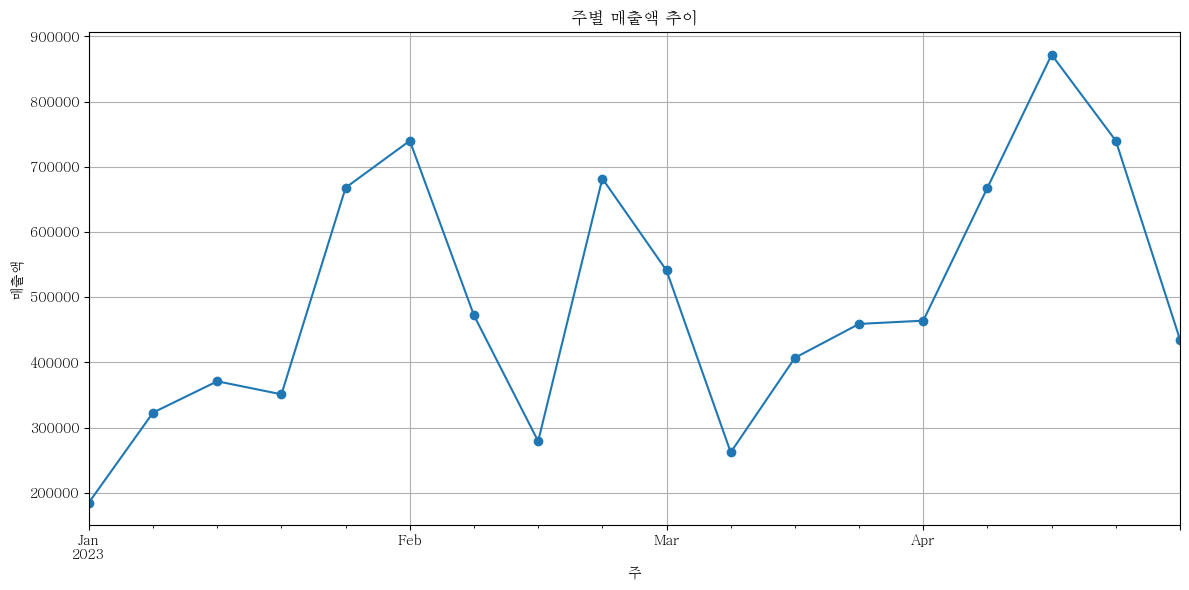

In [229]:
# 5-1
# weekly_revenue = df.resample('W')['TotalRevenue'].sum()
# plt.figure(figsize=(12, 6))
# sns.lineplot(x=weekly_revenue.index, y=weekly_revenue.values, marker='o') 
# plt.title('주별 총 매출액', fontsize=16)
# plt.xlabel('주', fontsize=12)
# plt.ylabel('총 매출액', fontsize=12)
# plt.grid(True)
# plt.show()

df['TotalRevenue'] = df['Quantity'] * df['Price']
df['OrderDate'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')

df.set_index('OrderDate', inplace=True)

weekly_revenue = df['TotalRevenue'].resample('W').sum()

plt.figure(figsize=(12,6))
weekly_revenue.plot(marker='o')
plt.title('주별 매출액 추이')
plt.xlabel('주')
plt.ylabel('매출액')
plt.grid(True)
plt.tight_layout()
plt.show()

Index(['OrderID', 'Product', 'Category', 'Quantity', 'Price', 'CustomerID',
       'Birthdate', 'OrderDate', 'Country', 'DiscountRate'],
      dtype='object')
   OrderID Product     Category  Quantity  Price  CustomerID   Birthdate  \
0        1     역사책        Books         5  37000        1071  1980-08-08   
1        2      셔츠     Clothing         5  20000        1526  1967-08-09   
2        3     노트북  Electronics         4   8000        1252  1973-04-07   
3        4     자전거       Sports         1   8000        1670  1970-04-08   
4        5     헤드폰  Electronics         3  26000        1838  1992-05-19   

          OrderDate Country  DiscountRate  
0  2024-06-10 17:18      미국          0.14  
1  2023-11-18 18:45      독일          0.29  
2  2023-10-15 11:19      중국          0.23  
3   2024-07-19 2:19      일본          0.20  
4  2024-01-20 20:34    대한민국          0.09  
2023-10-08 05:49:00 2024-10-03 10:55:00
(59, 9)
                     OrderID Product     Category  Quantity  Price  \
Or

C:\Users\Playdata\AppData\Local\Temp\ipykernel_9392\356767219.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period['TotalRevenue'] = df_period['Quantity'] * df_period['Price']
C:\Users\Playdata\AppData\Local\Temp\ipykernel_9392\356767219.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period['YearMonth'] = df_period.index.to_period('M')


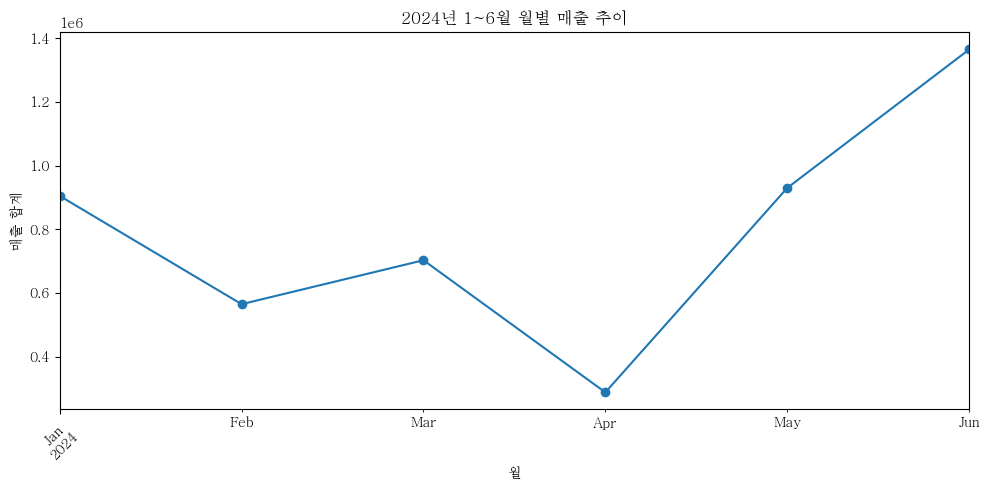

In [230]:
# OrderDate의 인덱스화로 데이터 다시 불러오고 진행하여 살짝 까다로움
df = pd.read_csv('./data/ecommerce_sales_data.csv')
print(df.columns)
print(df.head())

df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')
print(df['OrderDate'].min(), df['OrderDate'].max())  # 실제 날짜 범위 확인

df.set_index('OrderDate', inplace=True)
start_date = '2024-01-01'
end_date = '2024-06-30'
df_period = df.loc[(df.index >= start_date) & (df.index <= end_date)]
print(df_period.shape)
print(df_period.head())

# TotalRevenue 컬럼이 없으면 생성하기(데이터를 다시 불러왔기 때문)
if 'TotalRevenue' not in df_period.columns:
    df_period['TotalRevenue'] = df_period['Quantity'] * df_period['Price']

df_period['YearMonth'] = df_period.index.to_period('M')
monthly_sales = df_period.groupby('YearMonth')['TotalRevenue'].sum()
print(monthly_sales)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o')
plt.title('2024년 1~6월 월별 매출 추이')
plt.xlabel('월')
plt.ylabel('매출 합계')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [231]:
# 6-1.
# 고객별 주문 횟수 집계
order_counts = df.groupby('CustomerID')['OrderID'].nunique()

# 2회 이상 주문한 고객 수
repeat_customers = (order_counts >= 2).sum()

# 전체 고객 수
total_customers = order_counts.count()

# 재구매율 계산
repeat_rate = repeat_customers / total_customers

print(f'재구매율: {repeat_rate:.2%} (총 고객수: {total_customers}, 2회 이상 주문: {repeat_customers})')


재구매율: 8.11% (총 고객수: 111, 2회 이상 주문: 9)


카테고리별 평균 할인율:
 Category
Beauty         0.186522
Sports         0.179444
Electronics    0.175789
Food           0.174091
Books          0.170000
Clothing       0.154000
Name: DiscountRate, dtype: float64

카테고리별 매출:
 Category
Food           1966000
Electronics    1746000
Beauty         1493000
Books          1378000
Clothing       1279000
Sports         1057000
Name: TotalRevenue, dtype: int64

카테고리별 할인율&매출액:
                평균 할인율      매출액
Category                      
Beauty       0.186522  1493000
Sports       0.179444  1057000
Electronics  0.175789  1746000
Food         0.174091  1966000
Books        0.170000  1378000
Clothing     0.154000  1279000


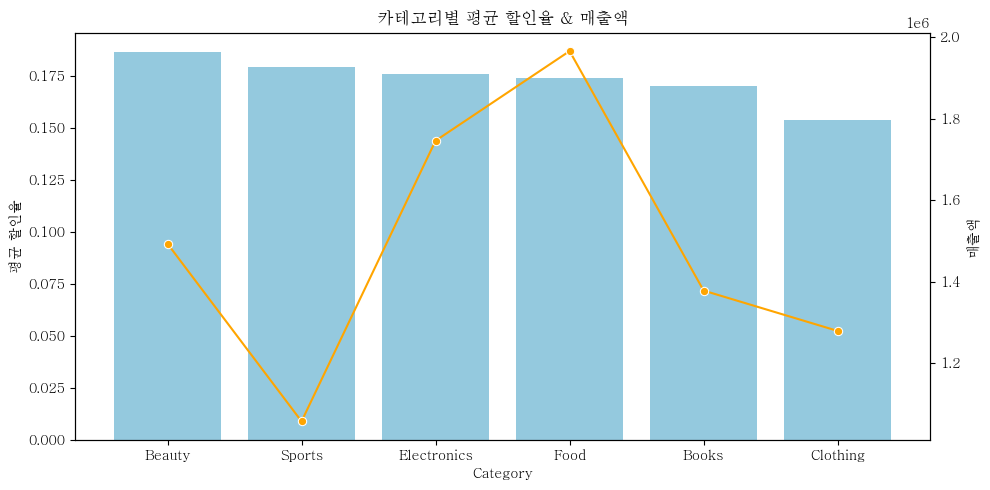

In [235]:
# 6-2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.
# 2. DiscountRate 숫자형 변환
df['DiscountRate'] = pd.to_numeric(df['DiscountRate'], errors='coerce')

# 3. 'TotalRevenue' 컬럼 없을 경우 생성(위에서 데이터 문제를 계속 겪는중...)
if 'TotalRevenue' not in df.columns:
    df['TotalRevenue'] = df['Quantity'] * df['Price']

# 4. 카테고리별 평균 할인율
category_discount = df.groupby('Category')['DiscountRate'].mean().sort_values(ascending=False)
print("카테고리별 평균 할인율:\n", category_discount)

# 5. 카테고리별 매출 집계
category_sales = df.groupby('Category')['TotalRevenue'].sum().sort_values(ascending=False)
print("\n카테고리별 매출:\n", category_sales)

# 6. 두 값 합쳐서 보기
discount_sales = pd.concat([category_discount, category_sales], axis=1)
discount_sales.columns = ['평균 할인율', '매출액']
print("\n카테고리별 할인율&매출액:\n", discount_sales)

# 7. 시각화 (인덱스를 컬럼으로)
discount_sales_sorted = discount_sales.sort_values('평균 할인율', ascending=False).reset_index()

fig, ax1 = plt.subplots(figsize=(10,5))
sns.barplot(x='Category', y='평균 할인율', data=discount_sales_sorted, ax=ax1, color='skyblue')
ax1.set_ylabel('평균 할인율')

ax2 = ax1.twinx()
sns.lineplot(x='Category', y='매출액', data=discount_sales_sorted, ax=ax2, marker='o', color='orange')
ax2.set_ylabel('매출액')

plt.title('카테고리별 평균 할인율 & 매출액')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
